In [51]:
# Dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import oscar speech csv
oscar_speech = pd.read_csv('../data/oscar_speech_db.csv')
oscar_speech.head()

,Year,Category,Film Title,Winner,Presenter,Date & Venue,Speech
0,1939 (12th) Academy Awards,Actress,Gone with the Wind,Vivien Leigh,Spencer Tracy,"February 29, 1940; Ambassador Hotel, Cocoanut ...","VIVIEN LEIGH:\r\nLadies and gentlemen, please..."
1,1939 (12th) Academy Awards,Actress in a Supporting Role,Gone with the Wind,Hattie McDaniel,Fay Bainter,"February 29, 1940; Ambassador Hotel, Cocoanut ...",HATTIE McDANIEL:\r\nAcademy of Motion Picture...
2,1941 (14th) Academy Awards,Actor in a Supporting Role,How Green Was My Valley,Donald Crisp,James Stewart,"February 26, 1942; Biltmore Hotel, Biltmore Bo...","DONALD CRISP:\r\nLadies and gentlemen, it's a..."
3,1941 (14th) Academy Awards,Actress,Suspicion,Joan Fontaine,Ginger Rogers,"February 26, 1942; Biltmore Hotel, Biltmore Bo...",JOAN FONTAINE:\r\nI want to thank the ladies ...
4,1941 (14th) Academy Awards,Actress in a Supporting Role,The Great Lie,Mary Astor,Ginger Rogers,"February 26, 1942; Biltmore Hotel, Biltmore Bo...","MARY ASTOR:\r\nLadies and gentlemen, twenty-t..."


In [3]:
#The transcripts use several different iterations of capitalization for "Music Begins", will run searches & combine

In [4]:
# new dfs for each sub search
df1 = oscar_speech
df2 = oscar_speech
df3 = oscar_speech
df4 = oscar_speech

In [5]:
#sub string search with first capitalization iteration
sub = "music begins"
df1["Indexes"] = df1["Speech"].str.find(sub)
music_cues1 = df1.loc[df1['Indexes'] != -1]
music_cues1.count()

Year            9
Category        9
Film Title      9
Winner          9
Presenter       9
Date & Venue    9
Speech          9
Indexes         9
dtype: int64

In [6]:
#sub string search with second capitalization iteration - no results
sub = "music Begins"
df2["Indexes"] = df2["Speech"].str.find(sub)
music_cues2 = df2.loc[df2['Indexes'] != -1]
music_cues2.count()

Year            0
Category        0
Film Title      0
Winner          0
Presenter       0
Date & Venue    0
Speech          0
Indexes         0
dtype: int64

In [7]:
#sub string search with third capitalization iteration - no results
sub = "Music Begins"
df3["Indexes"] = df3["Speech"].str.find(sub)
music_cues3 = df3.loc[df3['Indexes'] != -1]
music_cues3.count()

Year            0
Category        0
Film Title      0
Winner          0
Presenter       0
Date & Venue    0
Speech          0
Indexes         0
dtype: int64

In [8]:
#sub string search with fourth capitalization iteration
sub = "Music begins"
df4["Indexes"] = df4["Speech"].str.find(sub)
music_cues4 = df4.loc[df4['Indexes'] != -1]
music_cues4.count()

Year            20
Category        20
Film Title      20
Winner          20
Presenter       20
Date & Venue    20
Speech          20
Indexes         20
dtype: int64

In [9]:
#Eliminate duplicate "Ida" speech, transcript uses both "music begins" & "Music begins" - they got warned twice :)
music_cues4 = music_cues4.loc[music_cues4["Film Title"] != "Ida"]

In [10]:
#combine
frames = [music_cues1, music_cues4]
combined_music_cues = pd.concat(frames)
combined_music_cues.count()

Year            28
Category        28
Film Title      28
Winner          28
Presenter       28
Date & Venue    28
Speech          28
Indexes         28
dtype: int64

In [11]:
#create no-speech df using sub search method
sub = "[No speech.]"
oscar_speech["Indexes"] = oscar_speech["Speech"].str.find(sub)
no_speech = oscar_speech.loc[oscar_speech['Indexes'] != -1]
no_speech.count()

Year            14
Category        14
Film Title      14
Winner          14
Presenter       14
Date & Venue    14
Speech          14
Indexes         14
dtype: int64

In [25]:
# One award in transcript uses "No Speeches" - create solo df
sub = "[No speeches.]"
oscar_speech["Indexes"] = oscar_speech["Speech"].str.find(sub)
no_speeches = oscar_speech.loc[oscar_speech['Indexes'] != -1]

# Combine with no_speech for total
frames2 = [no_speech, no_speeches]
combined_no_speech = pd.concat(frames2)
combined_no_speech.count()

/Users/Nathaniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


Category        15
Date & Venue    15
Film Title      15
Indexes         15
Presenter       15
Speech          15
Winner          15
Word Count       1
Year            15
dtype: int64

In [12]:
# create word counts column to measure speech length
oscar_speech_length = oscar_speech
oscar_speech_length["Word Count"] = oscar_speech['Speech'].str.split().str.len()
oscar_speech_length = oscar_speech_length.drop(columns=['Indexes'])
oscar_speech_length

,Year,Category,Film Title,Winner,Presenter,Date & Venue,Speech,Word Count
0,1939 (12th) Academy Awards,Actress,Gone with the Wind,Vivien Leigh,Spencer Tracy,"February 29, 1940; Ambassador Hotel, Cocoanut ...","VIVIEN LEIGH:\r\nLadies and gentlemen, please...",96
1,1939 (12th) Academy Awards,Actress in a Supporting Role,Gone with the Wind,Hattie McDaniel,Fay Bainter,"February 29, 1940; Ambassador Hotel, Cocoanut ...",HATTIE McDANIEL:\r\nAcademy of Motion Picture...,121
2,1941 (14th) Academy Awards,Actor in a Supporting Role,How Green Was My Valley,Donald Crisp,James Stewart,"February 26, 1942; Biltmore Hotel, Biltmore Bo...","DONALD CRISP:\r\nLadies and gentlemen, it's a...",149
3,1941 (14th) Academy Awards,Actress,Suspicion,Joan Fontaine,Ginger Rogers,"February 26, 1942; Biltmore Hotel, Biltmore Bo...",JOAN FONTAINE:\r\nI want to thank the ladies ...,44
4,1941 (14th) Academy Awards,Actress in a Supporting Role,The Great Lie,Mary Astor,Ginger Rogers,"February 26, 1942; Biltmore Hotel, Biltmore Bo...","MARY ASTOR:\r\nLadies and gentlemen, twenty-t...",46
...,...,...,...,...,...,...,...,...
1664,2016 (89th) Academy Awards,Writing (Original Screenplay),Manchester by the Sea,Written by Kenneth Lonergan,"Ben Affleck, Matt Damon","February 26, 2017; Dolby Theatre",KENNETH LONERGAN:\r\nThank you so much. I lov...,192
1665,2016 (89th) Academy Awards,Honorary Award,None,"To Jackie Chan, an international film star who...","Tom Hanks, Michelle Yeoh, Chris Tucker","November 12, 2016; The Governors Awards (Ray D...",JACKIE CHAN:\r\nAcademy Award! I still can't ...,355
1666,2016 (89th) Academy Awards,Honorary Award,None,"To Anne V. Coates, in recognition of a film ed...","Michael Tronick, Nicole Kidman, Richard Gere","November 12, 2016; The Governors Awards (Ray D...","ANNE V. COATES:\r\nThank you, thank you, than...",480
1667,None,None,None,None,None,None,None,1


In [67]:
#calculations for average speech length
word_count = oscar_speech_length.groupby(["Year"])
total_words = word_count["Word Count"].sum()
total_speeches = word_count["Year"].value_counts()
avg_speech_length = total_words / total_speeches
avg_speech_length

Year                        Year                      
1939 (12th) Academy Awards  1939 (12th) Academy Awards    108.500000
1941 (14th) Academy Awards  1941 (14th) Academy Awards     54.846154
1942 (15th) Academy Awards  1942 (15th) Academy Awards    173.666667
1943 (16th) Academy Awards  1943 (16th) Academy Awards    147.000000
1946 (19th) Academy Awards  1946 (19th) Academy Awards     81.333333
                                                             ...    
2013 (86th) Academy Awards  2013 (86th) Academy Awards    255.346154
2014 (87th) Academy Awards  2014 (87th) Academy Awards    230.703704
2015 (88th) Academy Awards  2015 (88th) Academy Awards    341.740741
2016 (89th) Academy Awards  2016 (89th) Academy Awards    258.518519
None                        None                            1.000000
Length: 75, dtype: float64

In [68]:
# create x axis
x_axis = oscar_speech["Year"]

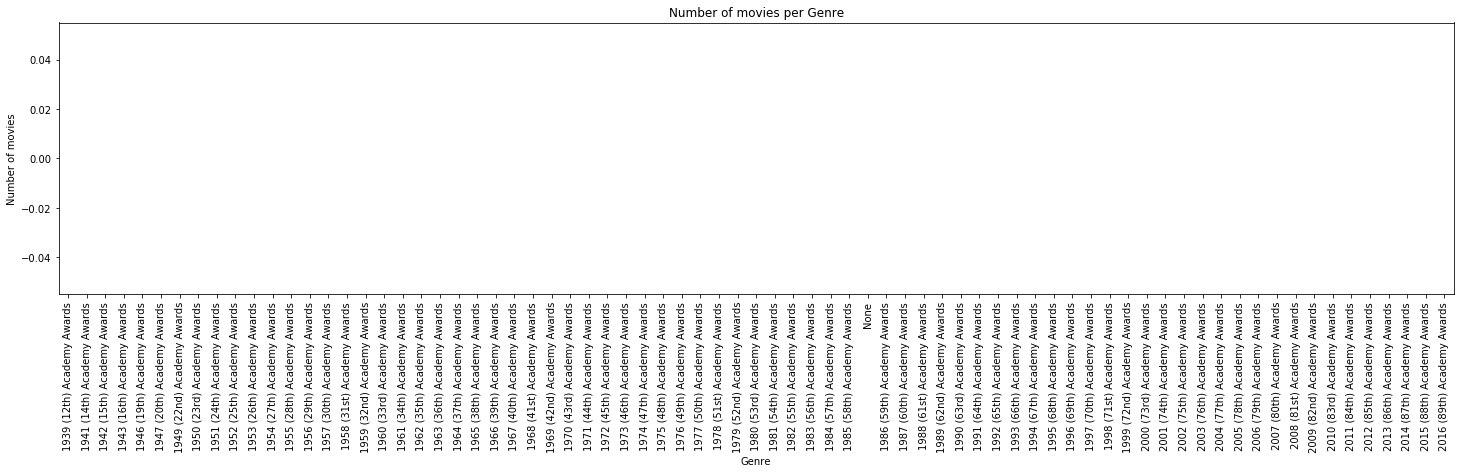

In [72]:
#plotting 
plt.subplots(figsize=(25,5));
sns.barplot(x=x_axis, y=avg_speech_length);
plt.xticks(rotation="vertical");
plt.xlabel("Award Year");
plt.ylabel("Avg. Number of Words in Speech");
plt.title("Avg. Number of Words in Academy Award Speeches");